In [105]:
# This notebook analyses the ouput of 
# running complexity.py

! grep 'parsing_for_temporal_criticality:' temporal_experiment_using_validation_data_for_MSE_bigger_model_all_cities.txt | grep -v Computing | sed "s/parsing_for_temporal_criticality: //g" > temp.csv
! (echo "cityname i_o_length prediction_horizon grid_size time_stamp IC_temp" && cat temp.csv) | sed "s/ /,/g" > IC_temp.csv 
! head IC_temp.csv

cityname,i_o_length,prediction_horizon,grid_size,time_stamp,IC_temp
london,4,1,55,2824,0
london,4,1,55,421,8717.0
london,4,1,55,7392,0
london,4,1,55,6019,2571.0
london,4,1,55,6834,4536.0
london,4,1,55,7693,0
london,4,1,55,3525,1995.0
london,4,1,55,3495,32200.0
london,4,1,55,7723,0


In [106]:
! grep 'parsing_model_predict_for_temporal_errors:' temporal_experiment_using_validation_data_for_MSE_bigger_model_all_cities.txt | grep -v Computing | sed "s/parsing_model_predict_for_temporal_errors: //g" > temp.csv
! (echo "cityname i_o_length prediction_horizon grid_size time_stamp MSE_train" && cat temp.csv) | sed "s/ /,/g" > MSE_train.csv 
! head MSE_train.csv

cityname,i_o_length,prediction_horizon,grid_size,time_stamp,MSE_train
london,4,1,55,4516,500.99510695613384
london,4,1,55,6503,716.4097180113338
london,4,1,55,8008,200.64600892601723
london,4,1,55,6521,612.950630478018
london,4,1,55,7405,173.87702552958552
london,4,1,55,805,512.2392922578708
london,4,1,55,229,442.24570710394806
london,4,1,55,537,548.062859713172
london,4,1,55,5088,338.3033016084539


In [107]:
combo_dict = {}


Index(['cityname', 'i_o_length', 'prediction_horizon', 'grid_size',
       'time_stamp', 'IC_temp'],
      dtype='object')


generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8965/8965 [00:01<00:00, 6248.52it/s]


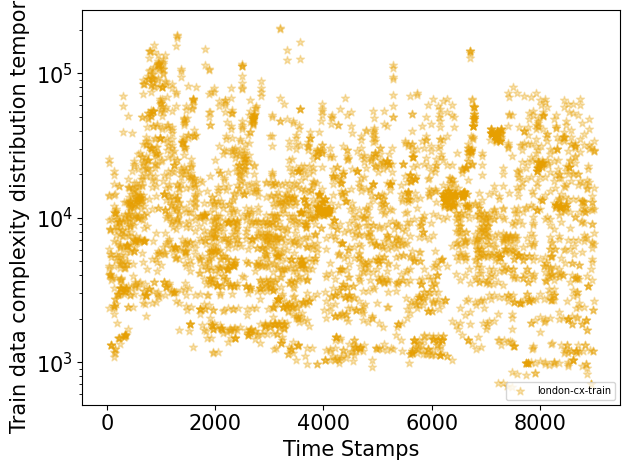

Index(['cityname', 'i_o_length', 'prediction_horizon', 'grid_size',
       'time_stamp', 'IC_temp'],
      dtype='object')


generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8963/8963 [00:01<00:00, 6004.08it/s]


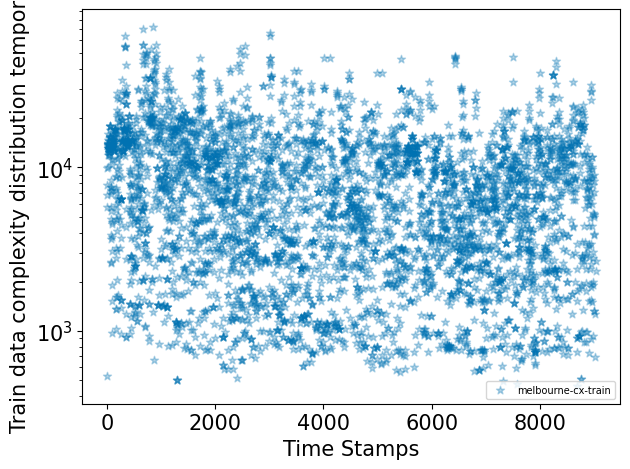

Index(['cityname', 'i_o_length', 'prediction_horizon', 'grid_size',
       'time_stamp', 'IC_temp'],
      dtype='object')


generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8966/8966 [00:01<00:00, 6421.73it/s]


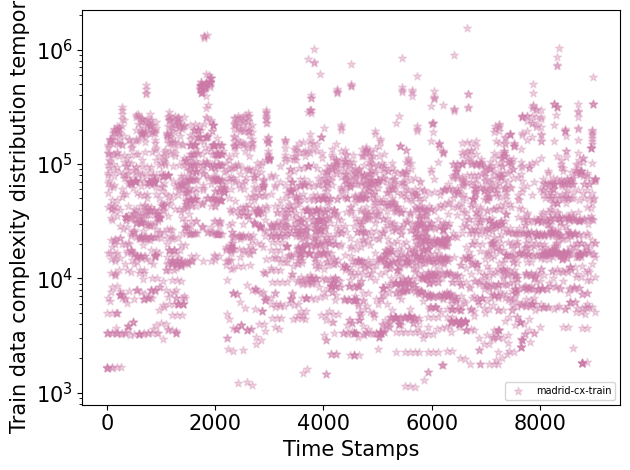

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


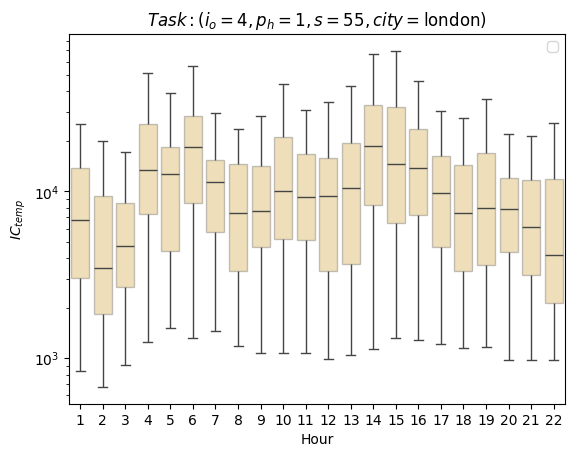

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


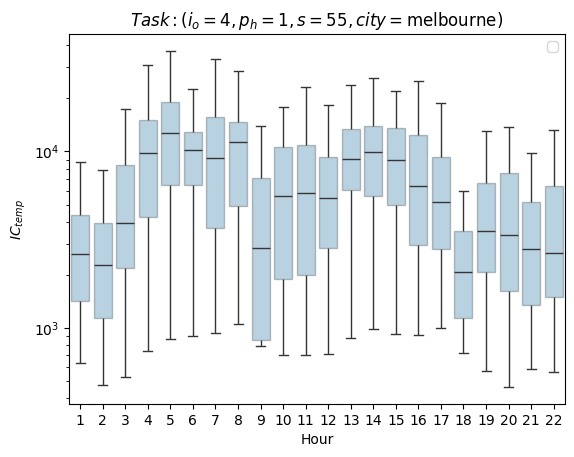

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


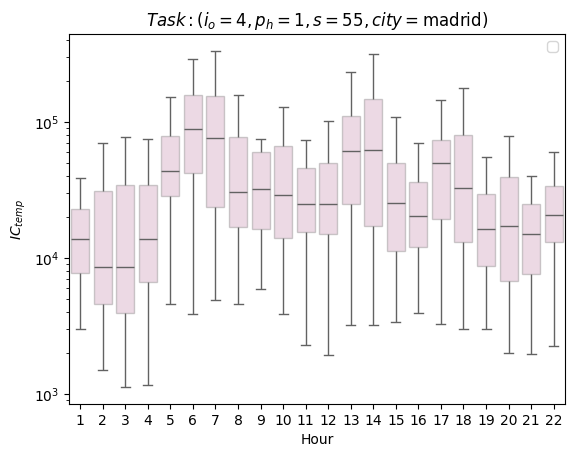

In [108]:
city_color = {"london" : "#E69F00", 
             "melbourne": "#0072B2",
             "madrid": "#CC79A7"}

import sys
import os

sys.path.append("../")
sys.path.append("../../")
# ! pip install -r ../../../requirements.txt

import config

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd
from tqdm import tqdm
import pandas as pd


# scales

violin_plot_dict_cx = {}

for city in config.city_list:
    cityname = city.lower()

    for CSR_type in [
    'IC_temp',
        ]:

        cityname = city.lower()
        city_label_printed = []
        
        df = pd.read_csv("IC_temp.csv")        
        print (df.columns)
        x = []
        y = []
        for scale in [55]: 
            for i_o_length in [4]:
                for pred_horiz in [1]:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    
                    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                    
                    violin_plot = []
                    for i in tqdm(range_, desc="generating-plot"):
                        x.append(filtered_rows.iloc[i]["time_stamp"])
                        y.append(filtered_rows.iloc[i][CSR_type])

                        violin_plot.append([filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type]])
                    violin_plot_dict_cx[cityname, i_o_length, pred_horiz, scale] = violin_plot
        plt.scatter(x,  y, marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])

    plt.xlabel("Time Stamps", fontsize=15)
    plt.ylabel("Train data complexity distribution temporal", fontsize=15)
    plt.yscale('log')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
    plt.tight_layout()
    plt.savefig("Temporal_dist_cx" + cityname + ".png")
    plt.show()

city_color = {"london" : "#E69F00", 
             "melbourne": "#0072B2",
             "madrid": "#CC79A7"}

import sys
import os

sys.path.append("../")
sys.path.append("../../")
# ! pip install -r ../../../requirements.txt

import config

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd
from tqdm import tqdm
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


plt.figure()
cityname_labelled = []
for key in violin_plot_dict_cx:
    cityname, i_o_length, pred_horiz, scale = key
    if scale != 55:
        continue

    df_cx = pd.DataFrame(violin_plot_dict_cx[key], columns=['ToD', 'IC_temp'])

    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)

    df_cx["Day"] = df_cx["ToD"] // periodicity
    df_cx["Hour"] = (df_cx["ToD"] % periodicity) // 4 + 1
    
    df_cx = df_cx[df_cx["IC_temp"] > 0]   
    df_cx[r"$IC_{temp}$"] = df_cx["IC_temp"]
    
    ax = sns.boxplot(data=df_cx, x="Hour", y=r"$IC_{temp}$", color=city_color[cityname], boxprops=dict(alpha=.3), showfliers=False)


    # print (cityname, df_cx.groupby("Hour")[r"$IC_{temp}$"].mean().tolist())
    if "IC" not in combo_dict:
        combo_dict["IC"] = {}
        combo_dict["IC"][cityname] = df_cx.groupby("Hour")[r"$IC_{temp}$"].mean().tolist()
    else:
        combo_dict["IC"][cityname] = df_cx.groupby("Hour")[r"$IC_{temp}$"].mean().tolist()
        
    
    plt.title(r"$Task:(i_o=4, p_h=1, s=55, city=$" + cityname + r"$)$")
    # plt.ylim(1, 600)
    plt.yscale('log')
    plt.legend()

    plt.savefig(str(key) + "_IC_Temp_Train" + cityname + ".png", dpi=300)
    plt.show()




Index(['cityname', 'i_o_length', 'prediction_horizon', 'grid_size',
       'time_stamp', 'MSE_train'],
      dtype='object')


generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9367/9367 [00:01<00:00, 5877.20it/s]


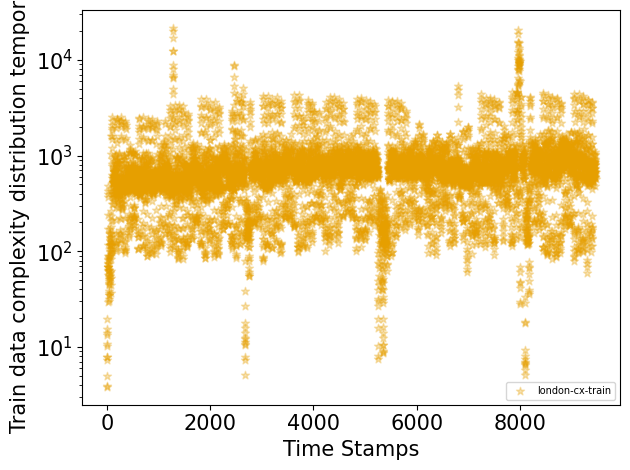

Index(['cityname', 'i_o_length', 'prediction_horizon', 'grid_size',
       'time_stamp', 'MSE_train'],
      dtype='object')


generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9193/9193 [00:01<00:00, 5954.88it/s]


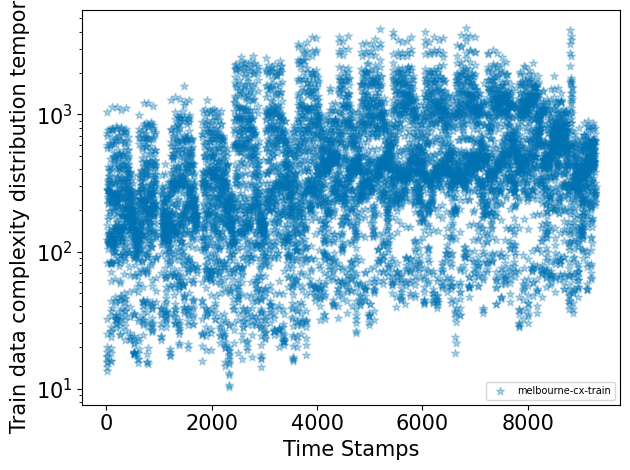

Index(['cityname', 'i_o_length', 'prediction_horizon', 'grid_size',
       'time_stamp', 'MSE_train'],
      dtype='object')


generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9281/9281 [00:01<00:00, 5166.15it/s]


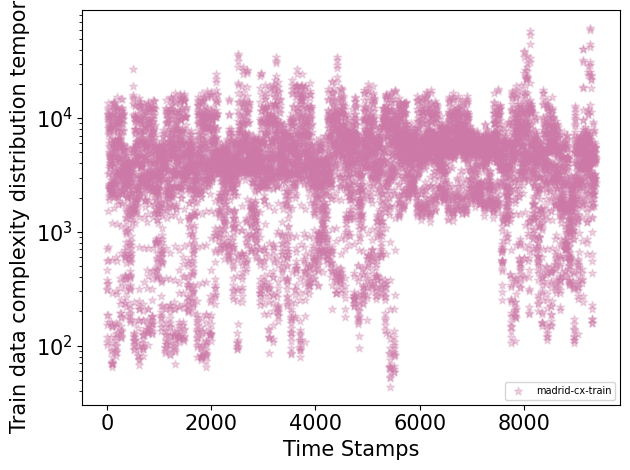

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


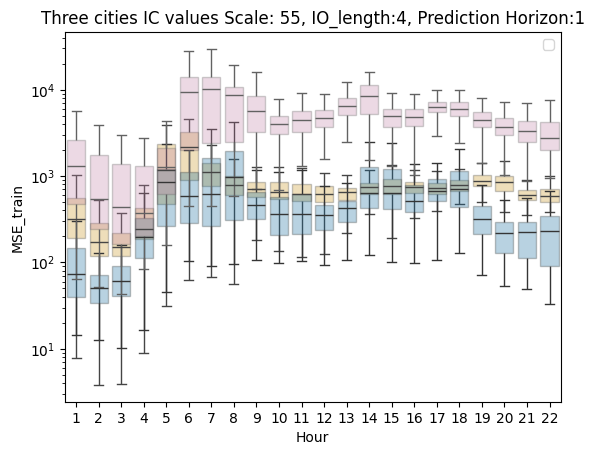

In [109]:
city_color = {"london" : "#E69F00", 
             "melbourne": "#0072B2",
             "madrid": "#CC79A7"}

import sys
import os

sys.path.append("../")
sys.path.append("../../")
# ! pip install -r ../../../requirements.txt

import config

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd
from tqdm import tqdm
import pandas as pd


# scales

violin_plot_dict_cx = {}

line_plot = {}
for city in config.city_list:
    cityname = city.lower()
    line_plot[cityname] = {"x":[], "y":[]}
    
for city in config.city_list:
    cityname = city.lower()

    for CSR_type in [
    'MSE_train',
        ]:

        cityname = city.lower()
        city_label_printed = []
        
        df = pd.read_csv("MSE_train.csv")        
        print (df.columns)
        x = []
        y = []
        for scale in [55]: 
            for i_o_length in [4]:
                for pred_horiz in [1]:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    
                    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                    
                    violin_plot = []
                    for i in tqdm(range_, desc="generating-plot"):
                        x.append(filtered_rows.iloc[i]["time_stamp"])
                        y.append(filtered_rows.iloc[i][CSR_type])

                        violin_plot.append([filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type]])
                    violin_plot_dict_cx[cityname, i_o_length, pred_horiz, scale] = violin_plot
        plt.scatter(x,  y, marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])
        line_plot[cityname]["x"].append(x)
        line_plot[cityname]["y"].append(y)

    plt.xlabel("Time Stamps", fontsize=15)
    plt.ylabel("Train data complexity distribution temporal", fontsize=15)
    plt.yscale('log')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
    plt.tight_layout()
    plt.savefig("Temporal_dist_cx" + cityname + ".png")
    plt.show()

city_color = {"london" : "#E69F00", 
             "melbourne": "#0072B2",
             "madrid": "#CC79A7"}
    


import sys
import os

sys.path.append("../")
sys.path.append("../../")
# ! pip install -r ../../../requirements.txt

import config

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd
from tqdm import tqdm
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


plt.figure()
cityname_labelled = []
for key in violin_plot_dict_cx:
    cityname, i_o_length, pred_horiz, scale = key
    if scale != 55:
        continue

    df_cx = pd.DataFrame(violin_plot_dict_cx[key], columns=['ToD', 'MSE_train'])

    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)

    df_cx["Day"] = df_cx["ToD"] // periodicity
    df_cx["Hour"] = (df_cx["ToD"] % periodicity) // 4 + 1
    
    df_cx = df_cx[df_cx["MSE_train"] > 0]    

    if "MSE" not in combo_dict:
        combo_dict["MSE"] = {}
        combo_dict["MSE"][cityname] = df_cx.groupby("Hour")["MSE_train"].mean().tolist()
    else:
        combo_dict["MSE"][cityname] = df_cx.groupby("Hour")["MSE_train"].mean().tolist()
        
    ax = sns.boxplot(data=df_cx, x="Hour", y="MSE_train", color=city_color[cityname], boxprops=dict(alpha=.3), showfliers=False)
    
plt.title(r"Three cities IC values Scale: 55, IO_length:4, Prediction Horizon:1")
# plt.ylim(1, 600)
plt.yscale('log')
plt.legend()

plt.savefig(str(key) + "_Temp_Train_Error.png", dpi=300)
plt.show()


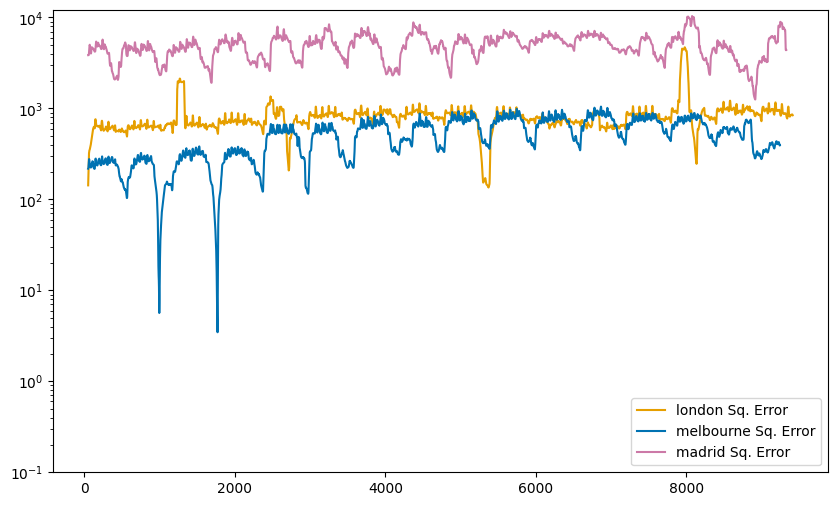

In [110]:
plt.figure(figsize=(10, 6))  # Width, height in inches

data_for_df = {}
for city in config.city_list:
    cityname = city.lower()    
    data_for_df[cityname] = {}
    
for city in config.city_list:
    cityname = city.lower()
    x = line_plot[cityname]["x"][0]
    y = line_plot[cityname]["y"][0]
    sorted_pairs = sorted(zip(x, y))
    sorted_x, sorted_y = zip(*sorted_pairs)
    
    n = 96
    plt.plot(np.convolve(sorted_x, [1/n]*n, "valid"), np.convolve(sorted_y, [1/n]*n, "valid"), 
             label=cityname + " Sq. Error", color=city_color[cityname])

    data_for_df[cityname]["x"] = np.convolve(sorted_x, [1/n]*n, "valid").flatten().tolist()
    data_for_df[cityname]["y"] = np.convolve(sorted_y, [1/n]*n, "valid").flatten().tolist()
    
plt.legend(loc="lower right")
plt.yscale("log")
plt.ylim(0.1, 12000)
plt.show()

import csv
# Save the data to a CSV file
with open("big_model_val_error_evolution_x.csv", mode='w') as f:
    csvwriter = csv.writer(f)
    for city in config.city_list:
        cityname = city.lower()    
        csvwriter.writerow([cityname] + data_for_df[cityname]["x"])
with open("big_model_val_error_evolution_y.csv", mode='w') as f:
    csvwriter = csv.writer(f)
    for city in config.city_list:
        cityname = city.lower()        
        csvwriter.writerow([cityname] + data_for_df[cityname]["y"])

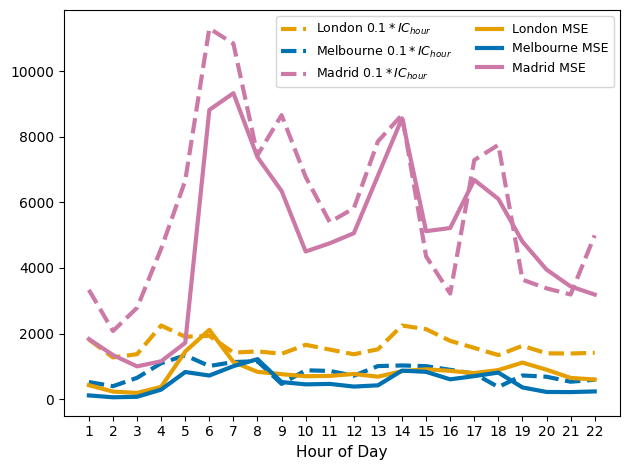

stats.pearsonr(combo_dict["IC"]["madrid"], combo_dict["MSE"]["madrid"]) : PearsonRResult(statistic=0.8122952924344561, pvalue=4.401892694622768e-06)
stats.pearsonr(combo_dict["IC"]["london"], combo_dict["MSE"]["london"]) : PearsonRResult(statistic=0.2694773499856506, pvalue=0.22521645633119505)
stats.pearsonr(combo_dict["IC"]["melbourne"], np.array(combo_dict["MSE"]["melbourne"]) ) : PearsonRResult(statistic=0.6134213488462603, pvalue=0.0023971348768312465)


In [111]:
LS = {}
LS["IC"] = "--"
LS["MSE"] = "-"


for key in combo_dict:
    for k in combo_dict[key]:
        value = combo_dict[key][k]
        if key == "IC":
            value = np.array(value) / 10
        plt.plot(range(1, 23),
                value, 
                 label=str(k).title() + " " + key.replace("IC", r"$0.1 * IC_{hour}$")
                , linestyle=LS[key],
                color=city_color[k],
                linewidth=3)
        # plt.hist( np.array(np.array(combo_dict[key][k]).flatten()%periodicity / 4 + i_o_length, "int"), label=str(k) )

# plt.yscale("log")
plt.legend(ncol=2, fontsize=9)
plt.xlabel("Hour of Day", fontsize=11)
plt.xticks(range(1, 23))
plt.tight_layout()
plt.savefig("IC_temp_normalised_three_cities_default_task_bigger_model.png", dpi=300)
plt.show()

from scipy import stats
from smartprint import smartprint as sprint

sprint (stats.pearsonr(combo_dict["IC"]["madrid"], combo_dict["MSE"]["madrid"]))
sprint (stats.pearsonr(combo_dict["IC"]["london"], combo_dict["MSE"]["london"]))
sprint (stats.pearsonr(combo_dict["IC"]["melbourne"], np.array(combo_dict["MSE"]["melbourne"]) ))

(1, 20)

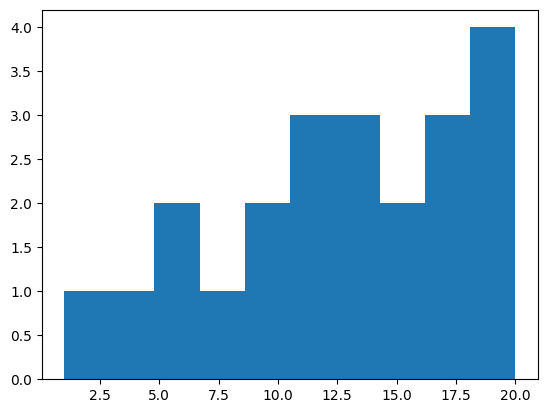

In [112]:
a = np.array(np.array(combo_dict[key][k]).flatten()%periodicity / 4, "int").tolist()
plt.hist(a)
min(a), max(a)

In [113]:
plt.plot(hourly_mean_MSE, label="MSE")
plt.plot(hourly_mean_IC, label="MSE")
plt.legend()
plt.yscale("log")
plt.show()

NameError: name 'hourly_mean_MSE' is not defined